In [ ]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [ ]:
from swmm_api.input_file.sections import LIDUsage
from swmm_api.input_file.sections import LIDControl
from swmm_api.input_file import read_inp_file, SwmmInput, section_labels as sections
from swmm_api.input_file import section_labels as sections
from swmm_api.input_file.helpers import InpSection

In [ ]:
import pandas as pd
import os

In [ ]:
from swmm_api import swmm5_run

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
os.chdir(r'\Sensitivity')

In [ ]:
df=pd.read_excel('param_values_BR.xlsx')
df

,num_vars,names,bound1,bound2
0,16.0,B1,75.0000,225.0000
1,NaN,B2,0.0500,0.1500
2,NaN,B3,0.0100,0.3000
3,NaN,B4,0.5000,1.5000
4,NaN,B5,225.0000,675.0000
5,NaN,B6,0.3000,0.7500
6,NaN,B7,0.1000,0.3000
7,NaN,B8,0.0235,0.0705
8,NaN,B9,40.0000,300.0000
9,NaN,B10,5.0000,60.0000


In [ ]:
bounds=[]
for index, row in df.iterrows():
    sub=[]
    sub.append(row['bound1'])
    sub.append(row['bound2'])
    bounds.append(sub)

In [ ]:
bounds

[[75.0, 225.0],
 [0.05, 0.15000000000000002],
 [0.01, 0.3],
 [0.5, 1.5],
 [225.0, 675.0],
 [0.3, 0.75],
 [0.1, 0.30000000000000004],
 [0.0235, 0.07050000000000001],
 [40.0, 300.0],
 [5.0, 60.0],
 [25.0, 75.0],
 [250.0, 750.0],
 [0.375, 1.0],
 [15.0, 100.0],
 [0.25, 0.75],
 [75.0, 225.0]]

In [ ]:
problem = {
    'num_vars': int(df['num_vars'][0]),
    'names': df['names'].tolist(),
    'bounds': bounds
}

In [ ]:
problem

{'num_vars': 16,
 'names': ['B1',
  'B2',
  'B3',
  'B4',
  'B5',
  'B6',
  'B7',
  'B8',
  'B9',
  'B10',
  'B11',
  'B12',
  'B13',
  'B14',
  'B15',
  'B16'],
 'bounds': [[75.0, 225.0],
  [0.05, 0.15000000000000002],
  [0.01, 0.3],
  [0.5, 1.5],
  [225.0, 675.0],
  [0.3, 0.75],
  [0.1, 0.30000000000000004],
  [0.0235, 0.07050000000000001],
  [40.0, 300.0],
  [5.0, 60.0],
  [25.0, 75.0],
  [250.0, 750.0],
  [0.375, 1.0],
  [15.0, 100.0],
  [0.25, 0.75],
  [75.0, 225.0]]}

In [ ]:
param_values = saltelli.sample(problem, 256)

In [ ]:
param_values.shape

(8704, 16)

In [ ]:
df2 = pd.DataFrame(param_values)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,75.878906,0.099805,0.206543,0.794922,575.683594,0.348340,0.173047,0.040299,114.648438,27.451172,47.753906,749.023438,0.522705,42.392578,0.506836,94.042969
1,211.230469,0.099805,0.206543,0.794922,575.683594,0.348340,0.173047,0.040299,114.648438,27.451172,47.753906,749.023438,0.522705,42.392578,0.506836,94.042969
2,75.878906,0.067383,0.206543,0.794922,575.683594,0.348340,0.173047,0.040299,114.648438,27.451172,47.753906,749.023438,0.522705,42.392578,0.506836,94.042969
3,75.878906,0.099805,0.114785,0.794922,575.683594,0.348340,0.173047,0.040299,114.648438,27.451172,47.753906,749.023438,0.522705,42.392578,0.506836,94.042969
4,75.878906,0.099805,0.206543,0.876953,575.683594,0.348340,0.173047,0.040299,114.648438,27.451172,47.753906,749.023438,0.522705,42.392578,0.506836,94.042969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,159.082031,0.075586,0.272246,0.630859,522.949219,0.652441,0.229297,0.062697,185.742188,5.537109,45.214844,356.445312,0.412842,93.193359,0.723633,106.933594
8700,159.082031,0.075586,0.272246,0.630859,522.949219,0.652441,0.229297,0.062697,185.742188,5.537109,45.214844,356.445312,0.508057,95.185547,0.723633,106.933594
8701,159.082031,0.075586,0.272246,0.630859,522.949219,0.652441,0.229297,0.062697,185.742188,5.537109,45.214844,356.445312,0.508057,93.193359,0.309570,106.933594
8702,159.082031,0.075586,0.272246,0.630859,522.949219,0.652441,0.229297,0.062697,185.742188,5.537109,45.214844,356.445312,0.508057,93.193359,0.723633,171.972656


In [ ]:
inp = read_inp_file('Sensitivity/Kowloon_FM2627_LID_1_50yr.inp')

In [ ]:
begin='  Subcatchment Runoff Summary'

In [ ]:
YT = np.zeros([param_values.shape[0]])

In [ ]:
YP = np.zeros([param_values.shape[0]])

In [ ]:
for i, row in df2.iloc[2963:].iterrows():
    inp[sections.LID_CONTROLS].add_obj(LIDControl(Name = "BC1", lid_kind = "BC",surfaces = 
                                              {'SURFACE': LIDControl.Surface(StorHt = row[0], VegFrac = row[1], Rough = row[2], Slope = row[3], Xslope = 0.0), 
                                               'SOIL': LIDControl.Soil(Thick = row[4], Por = row[5], FC = row[6], WP = row[7], Ksat = row[8], Kcoeff = row[9], Suct = row[10]), 
                                               'STORAGE': LIDControl.Storage(Height = row[11], Vratio = row[12], Seepage = row[13], Vclog = 0), 
                                               'DRAIN': LIDControl.Drain(Coeff = 0.5, Expon = row[14], Offset = row[15], Delay = "0")}))
    inp.write_file('Kowloon_FM2627_LID_1_50yr_sen.inp')
    swmm5_run('Kowloon_FM2627_LID_1_50yr_sen.inp')
    with open('Kowloon_FM2627_LID_1_50yr_sen.rpt') as f:
        for num, line in enumerate(f, 1):
            if begin in line:
                beginline=num
    df3=pd.read_csv('Kowloon_FM2627_LID_1_50yr_sen.rpt',skiprows=beginline+7,nrows=5917,delimiter=r'\s+',usecols=[0,8,9],names=['subcat','runoff','peak'],index_col=False)
    YT[i]=df3.runoff.sum()
    YP[i]=df3.peak.sum()

LIDControl: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s, Write]


In [ ]:
np.savetxt('YTF.txt',YT)
np.savetxt('YPF.txt',YP)

In [ ]:
YTF=np.loadtxt('YTF.txt',float)
YPF=np.loadtxt('YPF.txt',float)

In [ ]:
Si = sobol.analyze(problem, YTF)

In [ ]:
print(Si['S1'])

[ 0.09148526 -0.00173872  0.          0.          0.05644597  0.03802381
  0.00108397  0.00210007  0.5235082   0.00532682 -0.00058262  0.02997852
  0.00564062  0.05507515  0.03267028 -0.00071779]


In [ ]:
print([round(num, 3) for num in Si['S1']])

[0.091, -0.002, 0.0, 0.0, 0.056, 0.038, 0.001, 0.002, 0.524, 0.005, -0.001, 0.03, 0.006, 0.055, 0.033, -0.001]


In [ ]:
print(np.round(Si['S2'], 2))

[[  nan -0.03 -0.03 -0.03 -0.02 -0.02 -0.03 -0.03  0.   -0.03 -0.03 -0.02
  -0.03 -0.03 -0.02 -0.03]
 [  nan   nan  0.    0.    0.01  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [  nan   nan   nan  0.    0.    0.   -0.   -0.    0.    0.   -0.   -0.
  -0.   -0.    0.   -0.  ]
 [  nan   nan   nan   nan  0.    0.   -0.   -0.    0.    0.   -0.   -0.
  -0.   -0.    0.   -0.  ]
 [  nan   nan   nan   nan   nan  0.   -0.02 -0.02 -0.01 -0.02 -0.02 -0.01
  -0.01 -0.01 -0.01 -0.02]
 [  nan   nan   nan   nan   nan   nan  0.04  0.04  0.02  0.04  0.04  0.04
   0.04  0.04  0.04  0.04]
 [  nan   nan   nan   nan   nan   nan   nan -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan -0.01 -0.01  0.01
   0.01  0.03 -0.01 -0.01]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan -0.01 -0.
  -0.   -0.01 -0.01 -0.01]
 [

In [ ]:
Si2 = sobol.analyze(problem, YPF)

In [ ]:
print([round(num, 3) for num in Si2['S1']])

[0.143, 0.002, 0.0, 0.0, 0.013, 0.004, -0.0, 0.002, 0.655, 0.001, -0.004, 0.006, -0.002, -0.004, 0.0, 0.001]


In [ ]:
print(np.round(Si2['S2'], 2))

[[  nan -0.    0.    0.    0.01  0.01  0.    0.    0.12  0.   -0.    0.
   0.    0.    0.    0.  ]
 [  nan   nan -0.01 -0.01 -0.01 -0.01 -0.01 -0.01  0.   -0.01 -0.01 -0.01
  -0.   -0.   -0.01 -0.01]
 [  nan   nan   nan  0.   -0.   -0.   -0.   -0.    0.    0.    0.    0.
  -0.    0.   -0.   -0.  ]
 [  nan   nan   nan   nan -0.   -0.   -0.   -0.    0.    0.    0.    0.
  -0.    0.   -0.   -0.  ]
 [  nan   nan   nan   nan   nan -0.   -0.   -0.    0.01 -0.   -0.   -0.
  -0.   -0.   -0.   -0.  ]
 [  nan   nan   nan   nan   nan   nan  0.02  0.02  0.02  0.02  0.02  0.02
   0.02  0.02  0.02  0.02]
 [  nan   nan   nan   nan   nan   nan   nan  0.   -0.    0.    0.    0.
   0.    0.    0.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan  0.01  0.01  0.01
   0.01  0.01  0.    0.  ]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan -0.   -0.
  -0.   -0.   -0.   -0.  ]
 [  

In [ ]:
total_Si2, first_Si2, second_Si2 = Si2.to_df()

In [ ]:
total_Si, first_Si, second_Si = Si.to_df()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

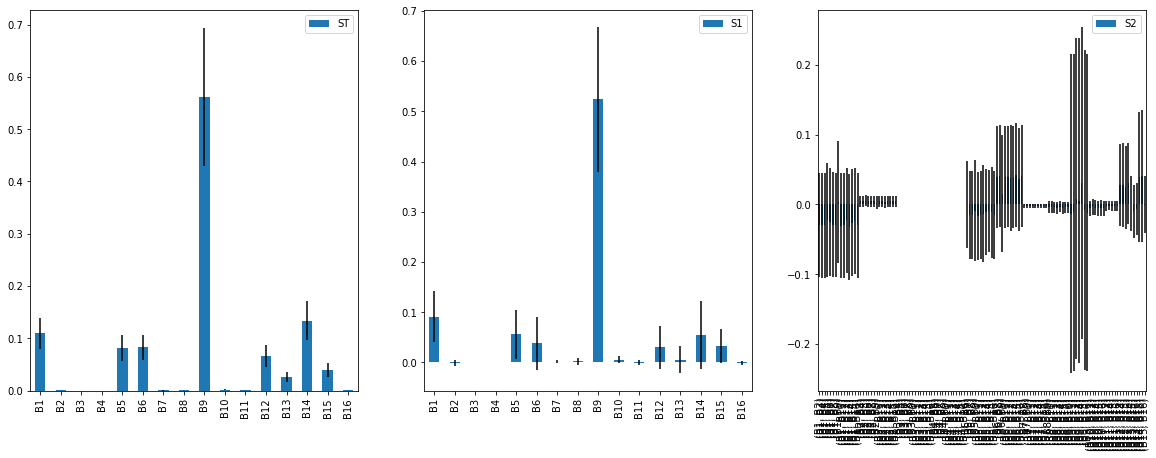

In [ ]:
plt.rcParams["figure.figsize"] = (20,7)
Si.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

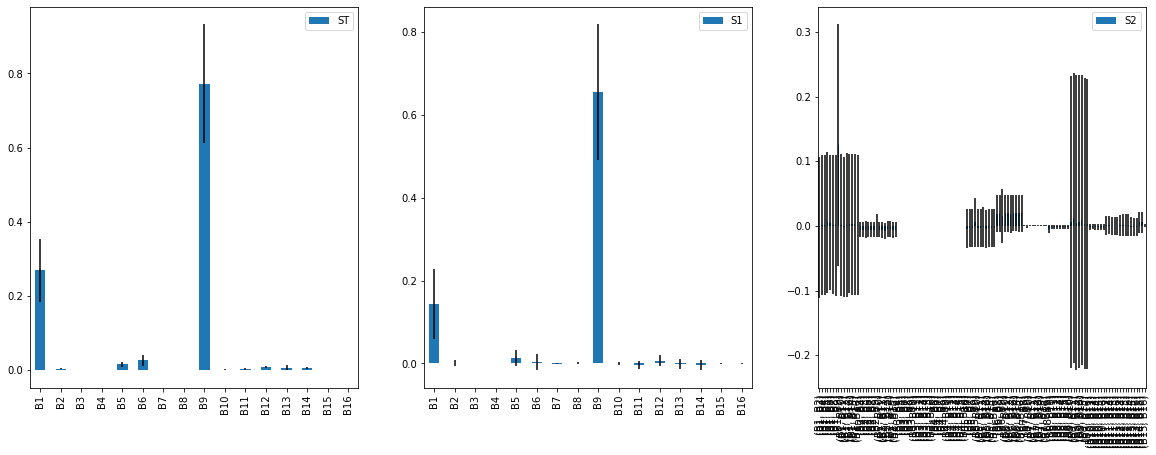

In [ ]:
Si2.plot()

In [ ]:
first_Si

,S1,S1_conf
P1,0.029961,0.041420
P2,0.000000,0.000000
P3,0.000000,0.000000
P4,0.000107,0.000331
P5,0.117892,0.136236
P6,-0.053364,0.043468
P7,0.135165,0.342246
P8,-0.343239,0.695646
P9,0.160782,0.262143
P10,2.372077,0.477428


In [ ]:
first_Si2

,S1,S1_conf
P1,0.093815,0.179732
P2,-0.000005,0.000008
P3,-0.000025,0.000071
P4,-0.000016,0.000046
P5,0.067745,0.127915
P6,-0.047214,0.086504
P7,0.776885,1.329418
P8,-0.588286,1.200013
P9,0.088701,0.166102
P10,1.068806,1.206825


In [ ]:
second_Si2

,S2,S2_conf
"(P1, P2)",-0.159948,0.217321
"(P1, P3)",-0.159954,0.217322
"(P1, P4)",-0.159952,0.217322
"(P1, P5)",-0.169855,0.224368
"(P1, P6)",-0.154044,0.212880
...,...,...
"(P9, P11)",-0.285106,0.356705
"(P9, P12)",-0.287910,0.365046
"(P10, P11)",-1.222390,0.801239
"(P10, P12)",-1.204312,0.800818
